In [37]:
# Image Classification Using Convolutional Neural Network CNN: Cifar 10 image dataset.
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [38]:
#Loading the dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [39]:
X_test.shape

(10000, 32, 32, 3)

In [40]:
y_train.shape

(50000, 1)

In [41]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [42]:
# y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array now
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [43]:
y_test = y_test.reshape(-1,)

In [44]:
#Specifying the different classes of images.
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [45]:
# Plotting some images to see what they are
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

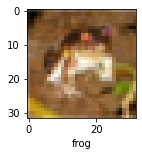

In [46]:
plot_sample(X_train, y_train, 0)

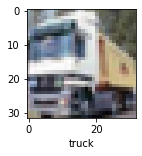

In [47]:
plot_sample(X_train, y_train, 1)

In [48]:
# Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. 
# Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

X_train = X_train / 255.0
X_test = X_test / 255.0

In [49]:
# Building simple Convolutional neural network for image classification
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [52]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.4714 - accuracy: 0.4703
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1100 - accuracy: 0.6134
Epoch 3/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9853 - accuracy: 0.6574
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9077 - accuracy: 0.6846
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8400 - accuracy: 0.7086
Epoch 6/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7853 - accuracy: 0.7294
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7339 - accuracy: 0.7434
Epoch 8/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6922 - accuracy: 0.7593
Epoch 9/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.6529 - accuracy: 0.7747
Epoch 10/10
1563/1563 [==============================] - 69s 44m

In [59]:
#Using Confusion matrix for model evaluation score.
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 15ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1000
           1       0.80      0.82      0.81      1000
           2       0.64      0.57      0.61      1000
           3       0.56      0.43      0.49      1000
           4       0.62      0.69      0.65      1000
           5       0.56      0.68      0.61      1000
           6       0.73      0.82      0.77      1000
           7       0.80      0.71      0.75      1000
           8       0.81      0.78      0.80      1000
           9       0.72      0.80      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [60]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9190 - accuracy: 0.7019


[0.9189801812171936, 0.7019000053405762]

In [64]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 9s 27ms/step


array([[9.3040528e-04, 7.6480437e-06, 8.6170742e-03, 7.2946531e-01,
        2.3081454e-03, 1.4454430e-01, 1.1215204e-01, 2.2290013e-05,
        1.8231145e-03, 1.2974543e-04],
       [1.8664717e-03, 7.5060232e-03, 1.7821924e-07, 7.9323826e-08,
        1.5162740e-08, 5.0424320e-10, 4.9703103e-10, 4.9180318e-07,
        9.8814070e-01, 2.4861228e-03],
       [1.3370119e-01, 1.8171287e-01, 2.0050483e-04, 2.6372345e-03,
        2.0820960e-02, 1.2983497e-03, 4.5813233e-04, 9.8080114e-03,
        4.0228444e-01, 2.4707825e-01],
       [8.0348945e-01, 1.9356478e-02, 2.5527403e-02, 4.0420154e-04,
        1.0279315e-02, 1.0273189e-04, 2.0966440e-04, 3.9415183e-03,
        1.3072225e-01, 5.9669930e-03],
       [1.8718974e-05, 2.5106969e-05, 4.8220623e-02, 7.5232321e-03,
        2.4910435e-01, 7.9368311e-04, 6.9409031e-01, 1.8034932e-06,
        2.2120327e-04, 1.0260239e-06]], dtype=float32)

In [65]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [66]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

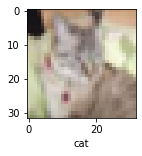

In [70]:
plot_sample(X_test, y_test,8)

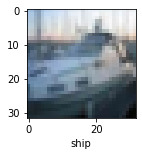

In [71]:
plot_sample(X_test, y_test,2)

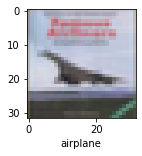

In [74]:
plot_sample(X_test, y_test,3)

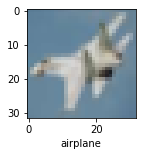

In [75]:
plot_sample(X_test, y_test,10)

In [77]:
classes[y_classes[3]]

'airplane'

In [80]:
classes[y_classes[5]]

'frog'

In [79]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9190 - accuracy: 0.7019


[0.9189801812171936, 0.7019000053405762]